# 4 Things to keep in mind before relocating for a job as a Developer

## Business Understanding

For this project, I was interestested in using Stack Overflow data from 2017 to better understand:

- As a budding developer, should you relocate for a job in the West (e.g. America, Europe, etc.)?
- Are developers really paid more in the West than they are in the East?
- Are the developers really satisfied with their jobs and career in the West?
- Should the developers need to develop new skills to get a job in either the West or the East?

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Data Understanding

First, I provided a general view to the data. I found out things like what level of developer they were and which country did they belong to. Also, I had a quick look on their employment status and how they thought about their paycheck.

In [2]:
# Read the data and provided a glimpse of it

df = pd.read_csv('D:/Udacity Data Scientist Nano Degree/Stack Over Flow/survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Data Understanding

def display_bar_chart(df, column, title):
    '''
    
    Displayed a bar chart with a title
    
    Parameters:
    
    df: a dataframe
    column: the column which I wanted to show
    title: the title of the chart
    
    Returns:
    
    None
    
    '''
    status_vals = df[column].value_counts()
    (status_vals[: 10] / df.shape[0]).plot(kind = "bar", color = (0.2, 0.4, 0.6, 0.6));
    plt.title(title);

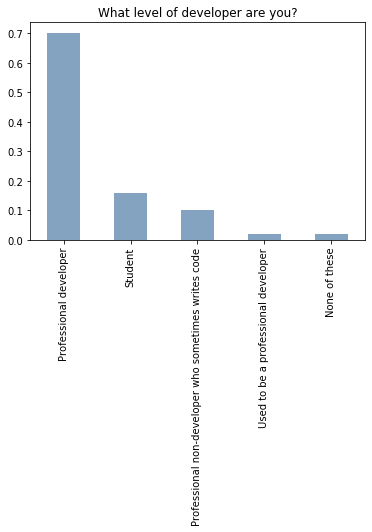

In [4]:
# Provided a pandas series of the counts for each Professional status

display_bar_chart(df, "Professional", "What level of developer are you?")

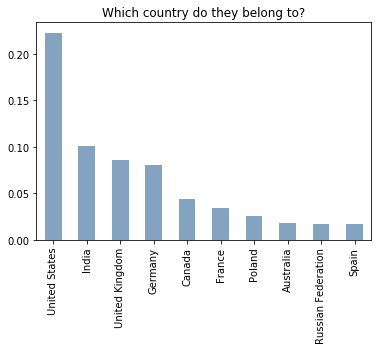

In [5]:
# Provided a pandas series of the counts of developers for each Country

display_bar_chart(df, "Country", "Which country do they belong to?")

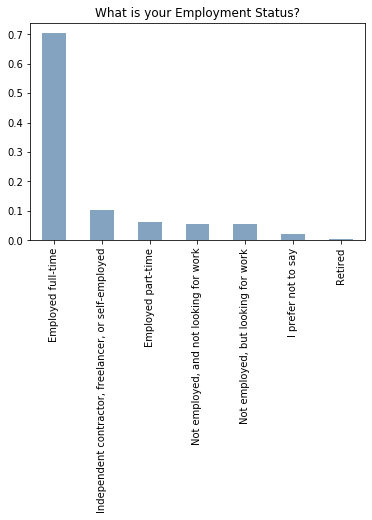

In [6]:
# Provided a pandas series of the counts for each Employment status

display_bar_chart(df, "EmploymentStatus", "What is your Employment Status?")

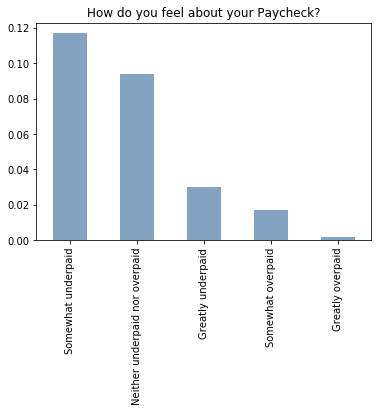

In [7]:
# Provided a pandas series of the counts for each Overpaid status

display_bar_chart(df, "Overpaid", "How do you feel about your Paycheck?")

## Data preparation

For categorical variable "Country", I seperated them into three sectors: The West, The East and The Rest of the World. The following code define the lists of related countries and create a new column to identify whether that person lives in the West or in the east.

In [8]:
def handling_country(df):
    '''
    
    Returned a dataframe with country seperated into the West, the East or the Rest of the World
    
    Parameters:
    
    df: a raw data dataframe
    
    Returns:
    
    df: a dataframe with a new column zones
    
    '''
    # For Categorical variables "Country", I seperated them into three sections: West, East or Rest of the world
    # The following lists separates the countries to West or East
    
    West = ['United States', 'Liechtenstein', 'Switzerland', 
           'Iceland', 'Norway', 'Israel', 'Denmark', 
           'Ireland', 'Canada', 'United Kingdom', 'Germany', 
           'Netherlands', 'Sweden', 'Luxembourg', 'Austria', 
           'Finland', 'France', 'Belgium', 'Spain', 'Italy',
           'Poland']

    East = ['Thailand', 'Singapore', 'Hong Kong', 
           'South Korea', 'Japan', 'China', 
           'Taiwan', 'Malaysia', 'India', 
           'Indonesia', 'Vietnam']
    
    # Added a new catagory seperating to West and East
    
    df['Zone'] = df['Country'].apply(lambda x: 'West' if x in West else ('East' if x in East else 'Rest of the World'))
    
    return df

Here I selected some useful columns for my analysis.

- Country: Country they were living
- YearsCodedJob: Years they spent coding
- EmploymentStatus: Their employment status
- Salary: Their Salary
- JobSatisfaction & CareerSatisfaction: Are they satisfied with their job and career
- Overpaid: How they think about their paycheck

I especially focused on employed full-time professional developer.

In [9]:
def data_preparation(df):
    '''
    
    Returned useful columns with query condition
    
    Parameters:
    
    df: a raw data dataframe
    
    Returns:
    
    useful_df: a filtered dataframe with only useful columns
    
    '''
    # Got some useful columns for analysis
    
    useful_columns = ['Country', 'YearsCodedJob', 'EmploymentStatus', 'CareerSatisfaction', 'JobSatisfaction', 'JobSeekingStatus', 'HoursPerWeek', 'Salary', 'Zone', 'Overpaid']
    useful_df = pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female') and EmploymentStatus == 'Employed full-time'"))[useful_columns]
    return useful_df

In [10]:
# Got some useful columns for analysis

df = handling_country(df)
df.head()
useful_df = data_preparation(df)
useful_df.head()

,Country,YearsCodedJob,EmploymentStatus,CareerSatisfaction,JobSatisfaction,JobSeekingStatus,HoursPerWeek,Salary,Zone,Overpaid
2,United Kingdom,20 or more years,Employed full-time,8.0,9.0,NaN,NaN,113750.0,West,Neither underpaid nor overpaid
7,Poland,7 to 8 years,Employed full-time,7.0,7.0,"I'm not actively looking, but I am open to new...",1.0,NaN,West,NaN
8,Colombia,7 to 8 years,Employed full-time,6.0,6.0,I am not interested in new job opportunities,2.0,NaN,Rest of the World,Neither underpaid nor overpaid
13,Germany,15 to 16 years,Employed full-time,8.0,6.0,I am actively looking for a job,3.0,NaN,West,NaN
14,United Kingdom,20 or more years,Employed full-time,8.0,8.0,NaN,NaN,100000.0,West,Somewhat underpaid


For categorical variable Overpaid, I changed it to calculatable integer value because I wanted to find out the mean of their opinion. The following code shows the mapping:

In [11]:
def handling_overpaid(df):
    """
    
    Convert Overpaid from words to integer for calculating the mean
    
    Parameters:
    
    df: a dataframe that would be converted
    
    Returns:
    
    dataframe: a converted dataframe with Overpaid column becomes measurable
    
    """
    overpaid_map = {
        'Greatly underpaid' : 1,
        'Somewhat underpaid' : 2,
        'Neither underpaid nor overpaid' : 3,
        'Somewhat overpaid' : 4,
        'Greatly overpaid' : 5,
        np.nan: np.nan
    }
    df['Overpaid'] = df['Overpaid'].apply(lambda x: np.nan if x == np.nan else overpaid_map[x] )
    
    return df

Here I grouped the dataframe by Zone and YearsCodedJob, and got their mean, it automatically ignored the missing or null value.

In [12]:
# Compared selected indicators between the zones

useful_df = handling_overpaid(useful_df)
comparison = useful_df.groupby(['Zone', 'YearsCodedJob']).mean()
comparison

CareerSatisfaction  JobSatisfaction  HoursPerWeek  \
Zone YearsCodedJob                                                         
East 1 to 2 years                6.624444         5.891111      5.653696   
     10 to 11 years              7.500000         6.550000      3.720000   
     11 to 12 years              7.342857         6.828571      3.733333   
     12 to 13 years              7.176471         6.088235      4.937500   
     13 to 14 years              7.333333         7.666667     26.000000   
...                                   ...              ...           ...   
West 6 to 7 years                7.644114         7.177267      2.211039   
     7 to 8 years                7.532209         7.179724      2.138060   
     8 to 9 years                7.558304         7.072438      2.096491   
     9 to 10 years               7.476000         6.988000      2.148026   
     Less than a year            7.811526         7.648438      1.818627   

                             Salary  Overpaid  
Zone YearsCodedJob                             
East 1 to 2 years       7742.553472  2.082418  
     10 to 11 years    33318.461069  2.461538  
     11 to 12 years    41902.774227  2.384615  
     12 to 13 years    53430.910772  2.428571  
     13 to 14 years    50170.185287  2.500000  
...                             ...       ...  
West 6 to 7 years      69648.807261  2.446512  
     7 to 8 years      70236.572056  2.431525  
     8 to 9 years      76314.628263  2.432927  
     9 to 10 years     74142.281505  2.430524  
     Less than a year  47639.855006  2.510870  

[63 rows x 5 columns]

For categorical variable YearsCodedJob, we transfer it to calculatable integer value because we want to find out the mean of how long they have been coded. The following code shows the mapping.

In [13]:
def handling_yearscodedjob(df):
    """
    
    Convert the working year to integer for calculating the mean
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with YearsCodedJob column becomes measurable
    
    """
    year_map = {'1 to 2 years' : 1, 
                '10 to 11 years' : 10, 
                '11 to 12 years' : 11, 
                '12 to 13 years' : 12,
                '13 to 14 years' : 13, 
                '14 to 15 years' : 14, 
                '15 to 16 years' : 15, 
                '16 to 17 years' : 16,
                '17 to 18 years' : 17, 
                '18 to 19 years' : 18, 
                '19 to 20 years' : 19, 
                '2 to 3 years' : 2,
                '20 or more years' : 20, 
                '3 to 4 years' : 3, 
                '4 to 5 years' : 4, 
                '5 to 6 years' : 5, 
                '6 to 7 years' : 6, 
                '7 to 8 years' : 7, 
                '8 to 9 years' : 8, 
                '9 to 10 years' : 9, 
                'Less than a year' : 0}
    
    df_graph = df.reset_index()
    df_graph['YearsCodedJob'] = df_graph['YearsCodedJob'].apply(lambda x: year_map[x])
    df_graph['YearsCodedJob'] = pd.to_numeric(df_graph['YearsCodedJob'])
    
    return df_graph

In [14]:
comparison_graph = handling_yearscodedjob(comparison)
comparison_graph = comparison_graph.sort_values(by='YearsCodedJob')

In [15]:
comparison_graph.set_index('YearsCodedJob', inplace=True)

## Results Evaluation

In this section, we will display the findings and discuss about it.

Here you can see a programmer’s salary in the east is much lower than that in the west no matter how many years you are coding.

Text(0, 0.5, 'Average Salary')

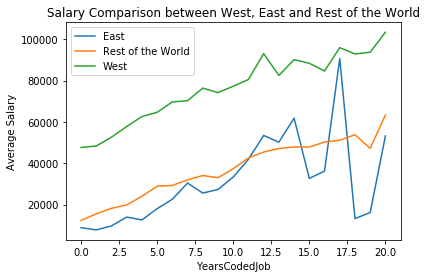

In [16]:
# Plot the Salary Comparison between Western World and Eastern World

comparison_graph.groupby('Zone')['Salary'].plot(legend=True)
plt.title("Salary Comparison between West, East and Rest of the World");
plt.xlabel('YearsCodedJob')
plt.ylabel('Average Salary')

The lines represent how they think they are overpaid, with a higher mark indicates the more they think they are overpaid.

You can see that eastern programmers (blue line) feel more underpaid in their whole careers than western programmers (green line)

Text(0, 0.5, 'Overpaid')

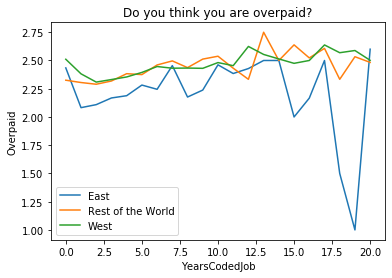

In [17]:
# Plot how the programmer thinks they are overpaid or not

comparison_graph.groupby('Zone')['Overpaid'].plot(legend=True)
plt.title("Do you think you are overpaid?");
plt.xlabel('YearsCodedJob')
plt.ylabel('Overpaid')

In [18]:
comparison.groupby('Zone').mean().CareerSatisfaction

Zone
East                 7.123803
Rest of the World    7.503250
West                 7.576207
Name: CareerSatisfaction, dtype: float64

In [19]:
comparison.groupby('Zone').mean().JobSatisfaction

Zone
East                 6.623020
Rest of the World    7.062847
West                 7.122752
Name: JobSatisfaction, dtype: float64

In [20]:
comparison.groupby('Zone').mean().Salary/50

Zone
East                  627.927284
Rest of the World     743.536241
West                 1529.287081
Name: Salary, dtype: float64

Here, we can see that the developers in the West (Brown circle) have a much higher satisfaction regarding their job and career, positioned at the right-high-up corner. The size of the circle is indicative of their average salary, size of the brown circle is much larger than the size of the green circle (average salary of developers in the East).

Text(0, 0.5, 'Job Satisfaction')

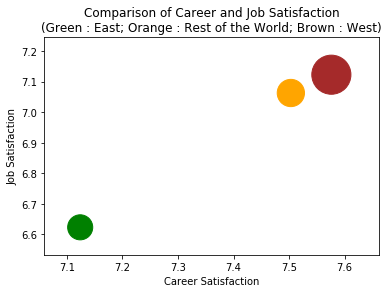

In [21]:
# Plot Comparison of Career and Job Satisfaction between West, East and Rest of the World

plt.scatter(comparison.groupby('Zone').mean().CareerSatisfaction, comparison.groupby('Zone').mean().JobSatisfaction, comparison.groupby('Zone').mean().Salary/50, c=['green','orange','brown'])

plt.title('Comparison of Career and Job Satisfaction\n(Green : East; Orange : Rest of the World; Brown : West)')
plt.xlabel('Career Satisfaction')
plt.ylabel('Job Satisfaction')

In [22]:
# Most Famous Languages By Country and Zones they represent

from collections import Counter

def get_Most_Used_Language(countryName):
    df1 = df.loc[(df.Country == countryName)]
    # print(df)
    temp = df.HaveWorkedLanguage.drop(df.loc[df.HaveWorkedLanguage.isnull()].index)
    languages = []
    for i in temp:
        if i is not None and type(i) is not float: 
            types = i.split(";")
            languages.extend(types)
    return Counter(languages).most_common(7)

In [23]:
countriesList = [ c[0] for c in Counter(df.Country).most_common(20)]
country_name = []
lang = [[], [], []]
row = {}
Popular_Languages = pd.DataFrame()
for ind, country in enumerate(countriesList):
    pLangs = get_Most_Used_Language(country)
    for i, l in enumerate(lang):
        l.append(pLangs[i][0])

Popular_Languages['Country'] = countriesList
Popular_Languages['1st Language'] = lang[0]
Popular_Languages['2nd Language'] = lang[1]
Popular_Languages['3rd Language'] = lang[2]

handling_country(Popular_Languages)
Popular_Languages.head(20)

,Country,1st Language,2nd Language,3rd Language,Zone
0,United States,SQL,JavaScript,Python,West
1,India,SQL,JavaScript,Python,East
2,United Kingdom,SQL,JavaScript,Python,West
3,Germany,SQL,JavaScript,Python,West
4,Canada,SQL,JavaScript,Python,West
5,France,SQL,JavaScript,Python,West
6,Poland,SQL,JavaScript,Python,West
7,Australia,SQL,JavaScript,Python,Rest of the World
8,Russian Federation,SQL,JavaScript,Python,Rest of the World
9,Spain,SQL,JavaScript,Python,West


## Conclusion

- I compared the salary based on how many years of coding experience a developer has had between the East and the West. I found that the salary of a developer in the East is much lower than that of the West no matter how many years of coding experince they have had.
- I also looked at the difference in opinion about feeling underpaid between developer both in the West and the East. This showed that more developers in the East thought that they were underpaid than the West irrespective of years of coding experience they have accumulated.
- I found that the Career and Job Satisfaction of the developers in the West are much higher than those in the East.
- Finally, I found that there is no language preference for programming between the East and the West so it should not prove to be a hindrance for getting a job while you are relocating from either zones.